# PACKAGES AND VISUALIZATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')

In [2]:
df=pd.read_excel('new_hotel_data.xlsx')
df.head() 

,hotel id,hotel name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,categories
0,hotel_558,Sultans of Spice,1,Bangalore,BluPetal Hotel 60 Jyoti Nivas College Road Kor...,BluPetal Hotel Koramangala,BluPetal Hotel Koramangala Bangalore,77.615428,12.933284,North Indian Mughlai,...,Yes,Yes,No,No,3,4.1,Green,Very Good,2416,HotelsHotel
1,hotel_603,The Fatty Bao - Asian Gastro Bar,1,Bangalore,610 3rd Floor 12th Main Off 80 Feet Road Indir...,Indiranagar,Indiranagar Bangalore,77.645396,12.970221,Asian,...,Yes,Yes,No,No,4,4.7,Dark Green,Excellent,2369,HotelsHotel
2,hotel_610,Toit,1,Bangalore,298 Namma Metro Pillar 62 100 Feet Road Indira...,Indiranagar,Indiranagar Bangalore,77.640709,12.979166,Italian American Pizza,...,No,No,No,No,4,4.8,Dark Green,Excellent,10934,HotelsHotel
3,hotel_574,Three Dots & A Dash,1,Bangalore,840/1100 Feet Road Metro Pillar 56-57 Indirana...,Indiranagar,Indiranagar Bangalore,77.640489,12.980410,European Continental,...,Yes,No,No,No,3,3.9,Yellow,Good,1354,HotelsHotel
4,hotel_570,Bombay Brasserie,1,Bangalore,2989/B 12th Main Road HAL 2nd Stage Indiranaga...,Indiranagar,Indiranagar Bangalore,77.645748,12.970324,Modern Indian,...,No,Yes,No,No,3,4.2,Green,Very Good,231,HotelsHotel


In [3]:
#which hotel has highest rating
df.groupby('hotel name')['Aggregate rating'].mean().sort_values(ascending=False).head(15)

hotel name
Sagar Gaire Fast Food                4.9
Rae's Coastal Cafe                   4.9
Toit                                 4.8
The Fatty Bao - Asian Gastro Bar     4.7
ECHOES Koramangala                   4.7
Truffles                             4.7
Sr. Sol 1                            4.6
Miyabi Kyoto Japanese Steak House    4.6
Flatbread Neapolitan Pizzeria        4.6
ABs - Absolute Barbecues             4.6
Barbeque Nation                      4.6
Bardenay                             4.5
Goldy's Breakfast Bistro             4.5
Central Perk 7                       4.5
The Bee's Knees                      4.5
Name: Aggregate rating, dtype: float64

In [4]:
#columns in the dataset
df.columns

Index(['hotel id', 'hotel name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'categories'],
      dtype='object')

In [5]:
#count of no of hotels in each city
df.City.value_counts()

Augusta         20
Bangalore       20
Bhopal          20
Albany          20
Bhubaneshwar    20
Athens          20
Boise            9
Armidale         1
Name: City, dtype: int64

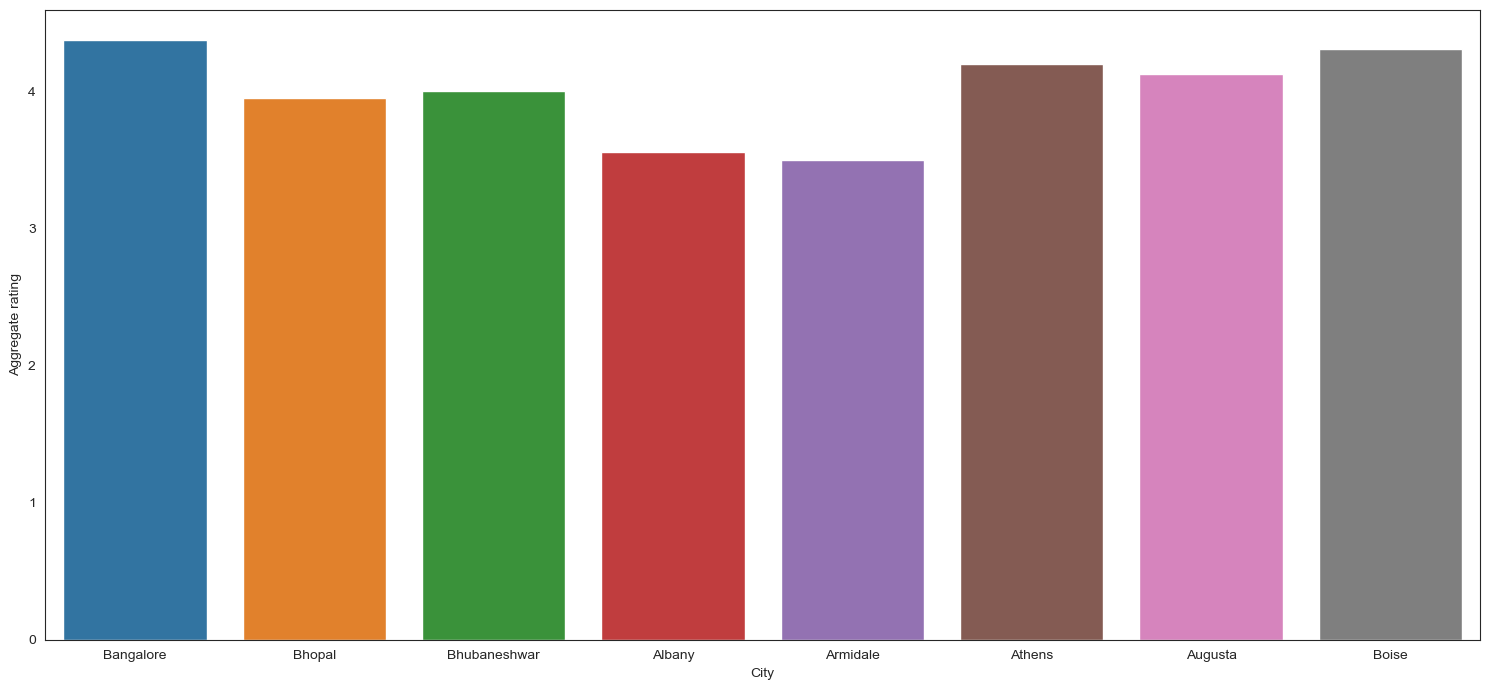

In [6]:
#aggregate rating for each city
plt.figure(figsize=(15,7), dpi=100)
sns.barplot(x='City',y='Aggregate rating',data=df,ci=None)
plt.tight_layout()

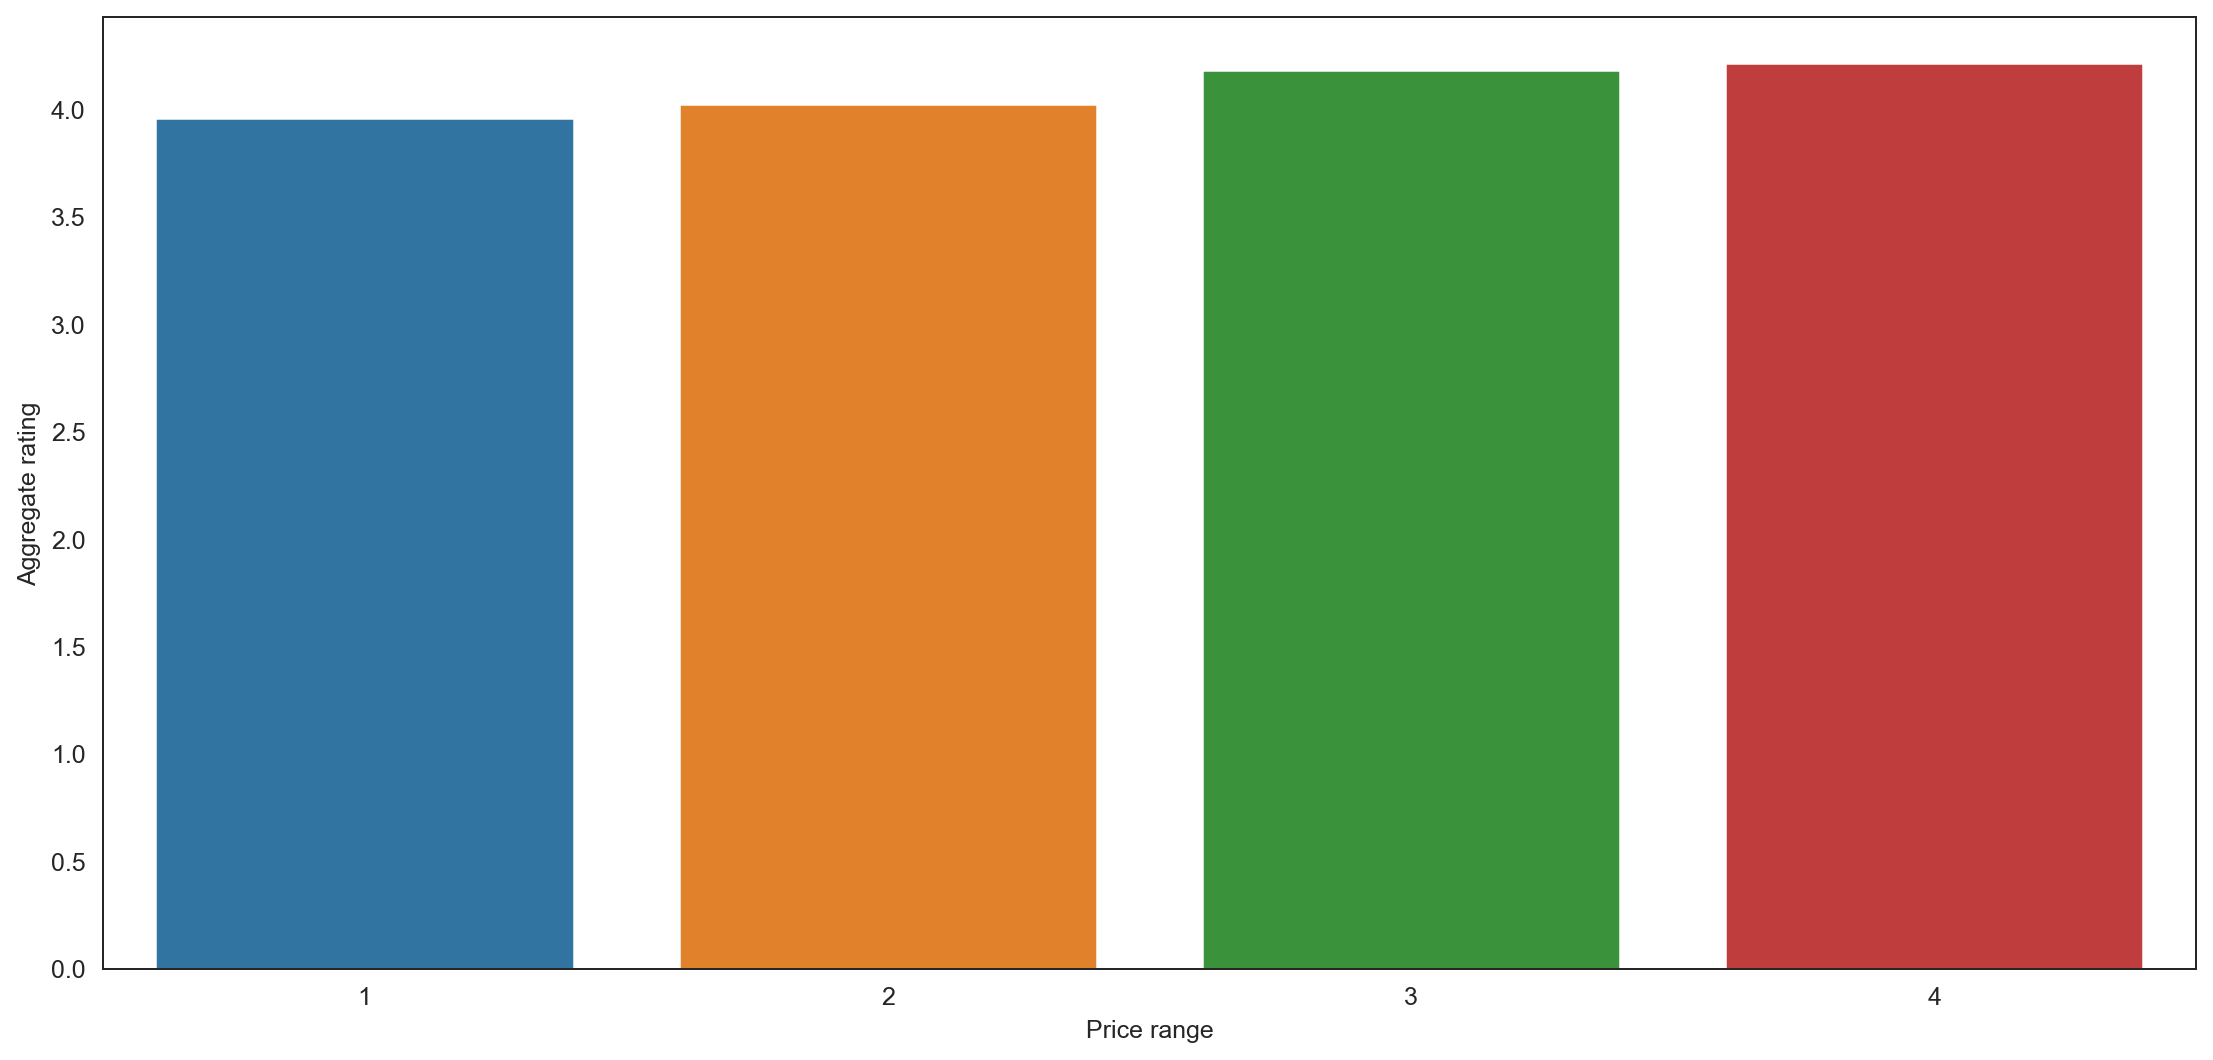

In [7]:
# more the price range ratings go higher little
plt.figure(figsize=(15,7), dpi=180,)
b=sns.barplot(x='Price range',y='Aggregate rating',data=df,ci=None)


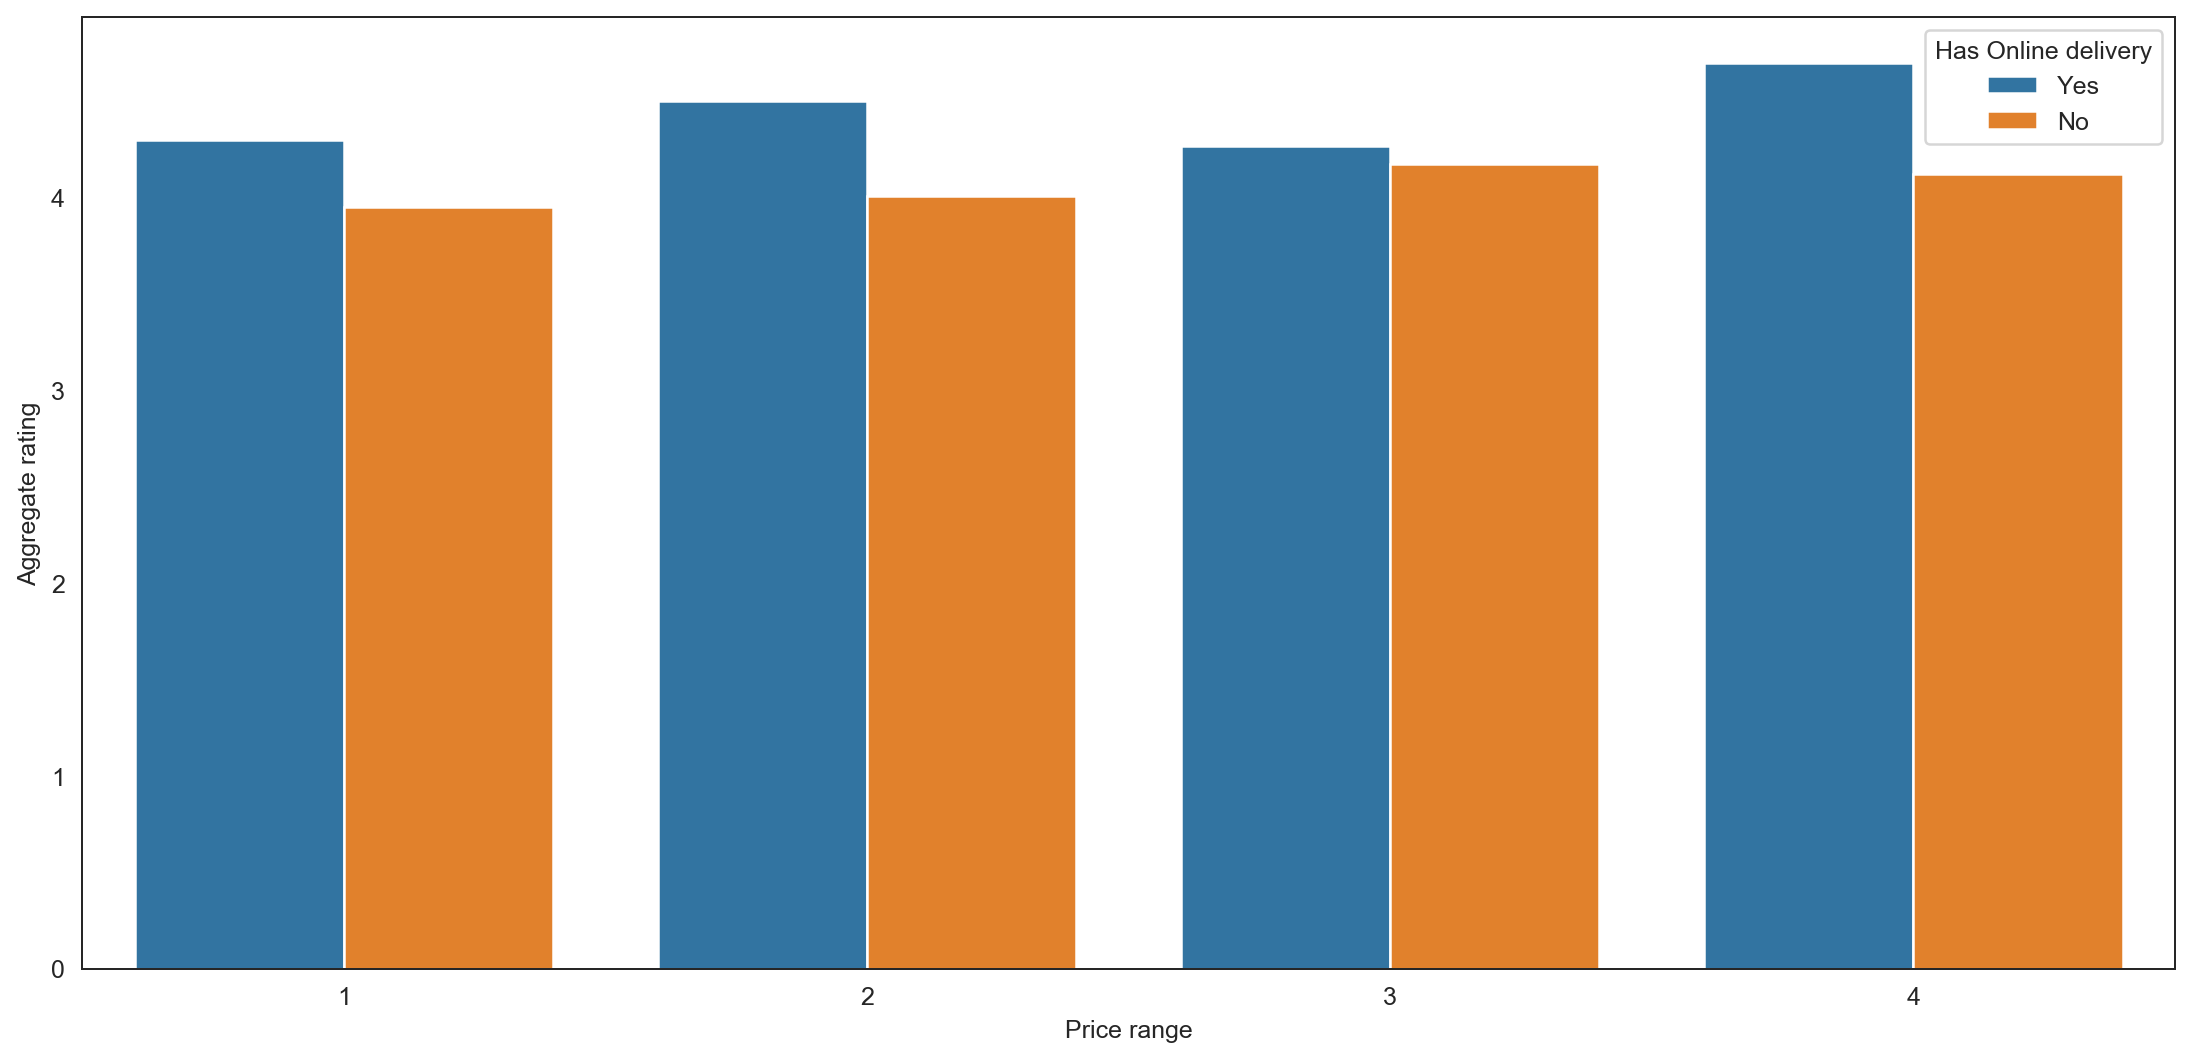

In [8]:
#if it has online deleivery it has good rating
plt.figure(figsize=(15,7), dpi=180,)
b=sns.barplot(x='Price range',y='Aggregate rating',hue='Has Online delivery',data=df,ci=None)

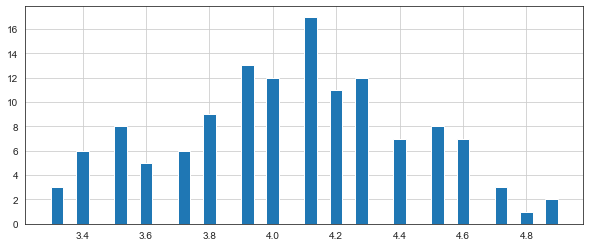

In [9]:
#many people have voted at 4.1
plt.figure(figsize=(10,4))
df['Aggregate rating'].hist(bins=40)

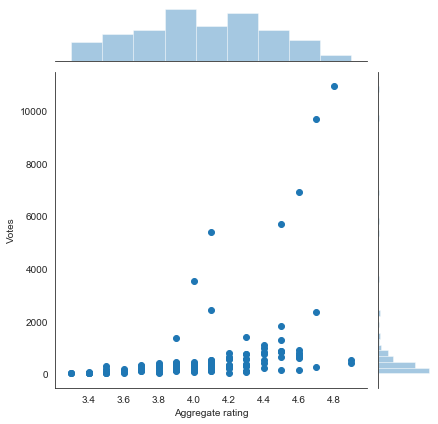

In [10]:
#no of votes for a particular rating
sns.jointplot(x='Aggregate rating',y='Votes',data=df)

# Rating file data explore


In [11]:
# Import the dataset and give the column names
# columns=['userId', 'productId', 'ratings','timestamp']
user_df=pd.read_excel('new_userhotelrating_small.xlsx')

In [12]:
user_df.head()

,user,product_code,rating
0,user_78131,hotel_558,3
1,user_78131,hotel_603,2
2,user_78131,hotel_610,3
3,user_78131,hotel_574,3
4,user_78131,hotel_570,3


In [13]:
user_df.shape

(49999, 3)

In [14]:
#Check the number of rows and columns
rows,columns = user_df.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  49999
Number of columns:  3


In [15]:
#Check the datatypes
user_df.dtypes

user            object
product_code    object
rating           int64
dtype: object

In [16]:
#Summary statistics of rating variable
user_df['rating'].describe().transpose()

count    49999.000000
mean         3.276046
std          1.111922
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [17]:
#Find the minimum and maximum ratings

print('Minimum rating is: %d' %(user_df.rating.min()))
print('Maximum rating is: %d' %(user_df.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [18]:
user_df = user_df.dropna()

In [19]:
#Check for missing values
print('Number of missing values across columns: \n',user_df.isnull().sum())

Number of missing values across columns: 
 user            0
product_code    0
rating          0
dtype: int64


In [20]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', user_df['user'].nunique())
# Number of unique product id  in the data
print('Number of unique hotels in Raw data = ', user_df['product_code'].nunique())

Number of unique users in Raw data =  915
Number of unique hotels in Raw data =  130


In [21]:
#Check the top 10 users based on ratings
most_rated = user_df.groupby('user').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 user
user_42069    69
user_56548    67
user_60087    67
user_60192    65
user_62269    64
user_75963    64
user_76717    64
user_61499    64
user_43213    64
user_26648    64
dtype: int64


In [22]:
counts = user_df.user.value_counts()

In [23]:
user_df_final = user_df[user_df.user.isin(counts[counts>=2].index)]

In [24]:
print('Number of users who have rated 50 or more hotels =', len(user_df_final))
print('Number of unique users in the final data = ', user_df_final['user'].nunique())
print('Number of unique Hotels in the final data = ', user_df_final['product_code'].nunique())

Number of users who have rated 50 or more hotels = 49999
Number of unique users in the final data =  915
Number of unique Hotels in the final data =  130


In [25]:
user_df_final.shape

(49999, 3)

In [26]:
#constructing the pivot table
final_ratings_matrix = user_df_final.pivot_table(index='user',columns='product_code',values='rating')
# final_ratings_matrix = electronics_df1_final.pivot(index = 'product_code', columns ='user', values = 'rating').fillna(0)

In [27]:
final_ratings_matrix.head()

product_code,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,...,hotel_630,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640
user,,,,,,,,,,,,,,,,,,,,,
user_21002,NaN,3.0,NaN,3.0,3.0,NaN,4.0,NaN,3.0,NaN,...,4.0,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN
user_21025,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,3.0,2.0,...,NaN,2.0,NaN,NaN,4.0,2.0,NaN,NaN,3.0,3.0
user_21042,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,3.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN
user_21051,NaN,2.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0
user_21054,NaN,1.0,NaN,1.0,NaN,3.0,4.0,2.0,NaN,4.0,...,4.0,NaN,NaN,NaN,3.0,2.0,1.0,2.0,4.0,4.0


In [28]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (915, 130)


In [29]:
train_data = user_df_final

#  Building Collaborative Filtering recommender model.


In [30]:
user_df_CF = train_data
user_df_CF.head()

,user,product_code,rating
0,user_78131,hotel_558,3
1,user_78131,hotel_603,2
2,user_78131,hotel_610,3
3,user_78131,hotel_574,3
4,user_78131,hotel_570,3


In [31]:
# Matrix with row per 'user' and column per 'item' 
pivot_df = user_df_CF.pivot_table(index = 'user', columns ='product_code', values = 'rating').fillna(0)

In [32]:
pivot_df.head()

product_code,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,...,hotel_630,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640
user,,,,,,,,,,,,,,,,,,,,,
user_21002,0.0,3.0,0.0,3.0,3.0,0.0,4.0,0.0,3.0,0.0,...,4.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0
user_21025,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,3.0,2.0,...,0.0,2.0,0.0,0.0,4.0,2.0,0.0,0.0,3.0,3.0
user_21042,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
user_21051,0.0,2.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0
user_21054,0.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,0.0,4.0,...,4.0,0.0,0.0,0.0,3.0,2.0,1.0,2.0,4.0,4.0


In [33]:
#pivot_df.to_excel('user.xlsx')

In [34]:
pivot_df.shape

(915, 130)

In [35]:
#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

product_code,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,...,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640,user_index
user,,,,,,,,,,,,,,,,,,,,,
user_21002,0.0,3.0,0.0,3.0,3.0,0.0,4.0,0.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0
user_21025,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,3.0,2.0,...,2.0,0.0,0.0,4.0,2.0,0.0,0.0,3.0,3.0,1
user_21042,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2
user_21051,0.0,2.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,3
user_21054,0.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,0.0,4.0,...,0.0,0.0,0.0,3.0,2.0,1.0,2.0,4.0,4.0,4


In [36]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

product_code,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,...,hotel_630,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,3.0,0.0,3.0,3.0,0.0,4.0,0.0,3.0,0.0,...,4.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0
1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,3.0,2.0,...,0.0,2.0,0.0,0.0,4.0,2.0,0.0,0.0,3.0,3.0
2,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
3,0.0,2.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0
4,0.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,0.0,4.0,...,4.0,0.0,0.0,0.0,3.0,2.0,1.0,2.0,4.0,4.0


#### Singular Value Decomposition

In [37]:
# # Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)

In [38]:
print(U[0])

[ 0.00336886 -0.00481977  0.02724786 -0.00988048 -0.03006574 -0.0082276
 -0.0529998  -0.08528036  0.01632848  0.02420354]


In [39]:
print(Vt[0])

[-0.00892976  0.07252882 -0.06422201 -0.04589672 -0.02305193 -0.05005765
  0.14646327 -0.02208458 -0.29647704 -0.07333204  0.01328451 -0.18736778
 -0.12928206 -0.0022404   0.00894371 -0.00225532  0.00275362 -0.08782401
  0.175002    0.03320285  0.02768643  0.01881266  0.08527072  0.0238612
  0.05678885  0.17314137 -0.12525301  0.02554032  0.07909906 -0.2268903
  0.05608314 -0.12662345  0.06697833 -0.02950276 -0.12007559  0.07283601
  0.03457328 -0.01512135  0.01494914 -0.03357764  0.1534601   0.03767127
  0.13187125  0.00614832  0.06463269 -0.15918646  0.04958318  0.03786322
 -0.06272311  0.0587886   0.05519533 -0.02063665 -0.17610424  0.02408624
 -0.05355719 -0.03656503  0.04096003  0.11721503  0.01034253 -0.03539374
  0.00165498  0.02229251 -0.02642307  0.10618789  0.09685811 -0.00650734
 -0.21819173  0.06500853 -0.15329688  0.13092029  0.04135588  0.04121085
  0.03030801  0.02396059  0.00272693 -0.0221022  -0.16702697 -0.00662354
 -0.00793474 -0.01972084  0.03395334  0.00707872 -0.0

In [40]:
print(sigma)

[ 73.75566859  74.73290633  76.06265562  78.28957093  79.21887661
  85.12775982  86.87909513  98.30933295 104.9634753  509.78831084]


In [41]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[ 73.75566859   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          74.73290633   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.          76.06265562   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          78.28957093   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          79.21887661
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   85.12775982   0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.          86.87909513   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.      

In [42]:
len(sigma)

10

In [43]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)

preds_df.head()

product_code,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,...,hotel_630,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640
0,1.070756,1.055129,0.913887,2.350313,1.611900,1.681639,2.232372,1.388372,1.449810,0.865565,...,1.932463,0.303085,2.589922,1.834359,1.307671,0.624711,1.997044,2.442143,2.697274,0.749062
1,-0.146098,0.979405,1.874487,1.811388,1.032915,1.895610,0.466344,2.522685,2.338781,1.862192,...,1.174590,1.163152,1.317506,-0.017922,1.544842,1.573352,1.342320,1.370155,1.739326,2.841874
2,0.044208,-0.106153,0.593722,-0.093189,3.556955,0.442465,3.487013,0.634692,2.195078,1.501089,...,1.924114,-0.076371,3.610589,1.318398,0.310728,0.969673,1.820401,0.962034,2.644631,-0.364440
3,0.163435,2.571291,4.735362,-0.646526,4.392927,0.677117,0.932994,0.631191,1.769733,-0.008408,...,6.538407,4.522339,0.681591,-0.421798,5.761699,4.301644,4.553078,2.758453,-0.933716,3.924036
4,-0.042961,1.244347,2.316014,0.677906,0.246026,2.362665,1.478395,1.774115,2.203451,1.314853,...,2.226761,1.590667,1.375852,0.600797,1.699163,1.665485,1.426666,1.868152,1.579439,2.228660


# Rmse value

In [44]:
pivot_df.mean().head()

product_code
hotel_501    0.184699
hotel_502    1.193443
hotel_503    1.485246
hotel_504    1.360656
hotel_506    1.767213
dtype: float64

In [45]:
preds_df.mean().head()

product_code
hotel_501    0.171797
hotel_502    1.196647
hotel_503    1.491288
hotel_504    1.346979
hotel_506    1.765580
dtype: float64

In [46]:
rmse_df = pd.concat([pivot_df.mean(),preds_df.mean()],axis=1)

In [47]:
rmse_df
rmse_df.columns = ['Average_actual_ratings','Average_predicted_ratings']

In [48]:
rmse_df

,Average_actual_ratings,Average_predicted_ratings
product_code,,
hotel_501,0.184699,0.171797
hotel_502,1.193443,1.196647
hotel_503,1.485246,1.491288
hotel_504,1.360656,1.346979
hotel_506,1.767213,1.765580
...,...,...
hotel_635,1.500546,1.518543
hotel_636,1.527869,1.531566
hotel_637,1.628415,1.631681


In [49]:
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

,Average_actual_ratings,Average_predicted_ratings,item_index
product_code,,,
hotel_501,0.184699,0.171797,0
hotel_502,1.193443,1.196647,1
hotel_503,1.485246,1.491288,2
hotel_504,1.360656,1.346979,3
hotel_506,1.767213,1.765580,4


In [50]:
Rmse_value = round((((rmse_df.Average_actual_ratings-rmse_df.Average_predicted_ratings)**2).mean()**0.5),5)

In [51]:
print('RMSE VALUE FOR THE MODEL IS = {}'.format(Rmse_value))


RMSE VALUE FOR THE MODEL IS = 0.01503
